In [1]:
import tensorflow as tf
import numpy as np
import matplotlib. pyplot as plt
from tensorflow import keras

In [ ]:
# Detect digits from 0 to 9 using MNIST dataset | mnist پروژه تشخیص اعداد با دیتاست
# این دیتاست شامل تصاویر اعداد دست‌نویس از ۰ تا ۹ هست

# Load the dataset and split it into train and test data | لود کردن دیتاست
mnist = keras.datasets.mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
train_features.shape

(60000, 28, 28)

In [4]:
test_features.shape

(10000, 28, 28)

3


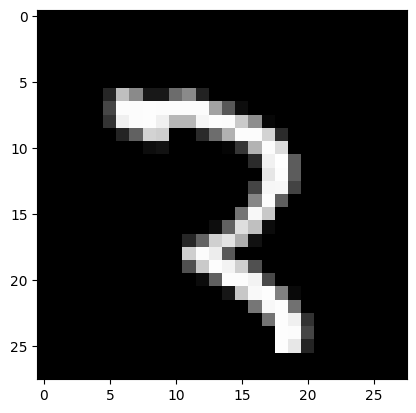

In [ ]:
# Visualizing the 501st sample | نمایش نمونه 501ام

idx = 500

img = train_features[idx]
print(train_labels[idx])

plt.gray()

plt.imshow(img)

**Pre-processing**

In [ ]:
# See the lowest and the highest brrightnes | دیدن کمترین و بیشترین مقدار یا روشنایی های پیکسل توی تصویر 501ام

np.min(img), np.max(img)

(np.uint8(0), np.uint8(255))

In [ ]:
# Normalize | نرمالسازی داده ها

train_features = train_features / 255.0
test_features = test_features / 255.0

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Model definition**

In [ ]:
# Define and train the model | ساخت و آموزش مدل

model = keras.Sequential()

# اینجا یک مرحله اضافه تر داریم چون دیتامون 28در28 هست که یعنی دو بعدیه
# ولی مدل های شبکه عصبی فقط یک بردار یک بعدی یا همون لیست رو میتونن روش پردازش انجام بدن
# پس میایم و ماتریس دو بعدیمون رو به یک بردار یک بعدی تغییر میدیم
# Reshape the data into 1D vectors
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))

# لایه خروجی
# این جا 10 تا نورون داریم که هرکدوم نماینده یکی از اعداد 0 تا 9 هست
# activation='softmax' -> باعث میشه خروجی‌ها به احتمال تبدیل بشن (همه‌ی خروجی‌ها بین ۰ تا ۱ هستن و جمع‌شون ۱ میشه)
# مثلا یکی از نورون ها میگه به نظر من این عکس، 10 درصد عدد 1 هستش. 21 درصد عدد 5 هستش و غیره
# این اکتیویشن میبینه کدوم یکی از 10 تا خروجی ها درصد بیشتری داره. اون رو 1 میکنه و بقیه رو 0
# In softmax activation, every neurun, representations one of the digit (0 - 9)
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
# Compile the model | کامپایل کردن

model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Define input shape | اینجا به مدل میگیم نمیدونم چند تا دیتا قراره بیاد تو مدل ولی هرچی بیاد 28 در 28 هستش
model.build(input_shape=(None, 28, 28))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model | ترِین کردن مدل

hist = model.fit(train_features, train_labels, epochs=500, batch_size=256, validation_data=(test_features, test_labels))

Epoch 1/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7943 - loss: 0.7369 - val_accuracy: 0.9460 - val_loss: 0.1884
Epoch 2/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9510 - loss: 0.1675 - val_accuracy: 0.9626 - val_loss: 0.1267
Epoch 3/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9671 - loss: 0.1109 - val_accuracy: 0.9659 - val_loss: 0.1116
Epoch 4/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9758 - loss: 0.0838 - val_accuracy: 0.9711 - val_loss: 0.0914
Epoch 5/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9793 - loss: 0.0678 - val_accuracy: 0.9737 - val_loss: 0.0804
Epoch 6/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9840 - loss: 0.0547 - val_accuracy: 0.9749 - val_loss: 0.0837
Epoch 7/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0427 - val_accuracy: 0.9766 - val_loss: 0.0755
Epoch 8/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9900 - loss: 0.0360 - val_acc

In [ ]:
# حالا پیشبینی مدل روی این نمونه رو ببینیم

# : خب ما قبلا تایین کردیم که
# model.build(input_shape=(None, 28, 28))
# این یعنی به مدل میگیم که انتظار داشته باش یه بچ با عکس های 28در28 دریافت کنی
# یعنی ممکنه 1دونه 1دونه دریافت کنی یا 1000تا 1000تا
# ولی در حال حاضر نمونه ما هیچ بچی نداره
img.shape

(28, 28)

In [ ]:
# حالا ما اینجا میایم و یه بچ هم به شیپ نمونه اضافه میکنیم تا نمونه با فرمت درست وارد مدل بشه و ارور نگیریم
# Reshape the datum into the correct format
img = np.reshape(img, (-1, 28, 28)) # -1 -> نامپای خودش عدد مناسب رو پیدا میکنه
img.shape

(1, 28, 28)

In [ ]:
# Predict | حالا میدیم مدلمون پیشبینی کنه
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

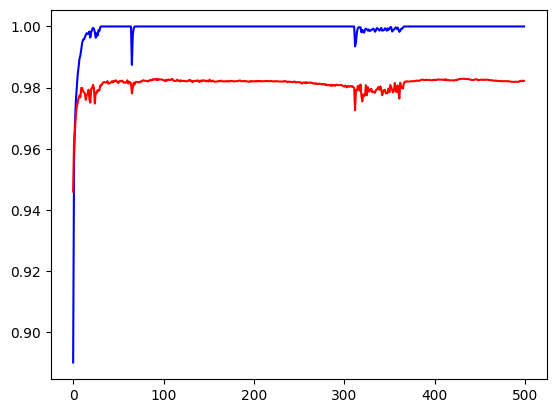

In [ ]:
# Comparison the model on train and test data | حالا میریم عملکرد مدل روی داده های ترِین و تست رو ببینیم

acc = hist.history['accuracy'] # Train data | داده ترِین
val_acc = hist.history['val_accuracy'] # Test data | داده تست

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')